<span style="font-family:Georgia; font-size:40px;">HDUF Source Detection & False-Color Imaging 

**Author:** Loren Alzona 
**Date:** December 9, 2025 
**Class:** ASTR 19

In [1]:
import numpy as np 
import sep 

In [2]:
from astropy.io import fits 
import matplotlib.pyplot as plt 
from matplotlib import rcParams 

%matplotlib inline 

rcParams['figure.figsize'] = [10.,8.] 

In [3]:
from astropy.utils.data import download_file 

image_file = "/Users/lorenalzona/Downloads/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits"

In [4]:
hdu_list = fits.open(image_file) 
hdu_list.info()

Filename: /Users/lorenalzona/Downloads/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     359   (3600, 3600)   float32   


In [5]:
image_data = hdu_list[0].data 

print(type(image_data)) 
print(image_data.shape) 

<class 'numpy.ndarray'>
(3600, 3600)


In [6]:
image_data = hdu_list[0].data 

In [7]:
hdu_list.close()

In [8]:
print(image_data.min(), image_data.max())
print(image_data.mean(), image_data.std())

-0.9047293 74.44648
0.00079129904 0.054868467


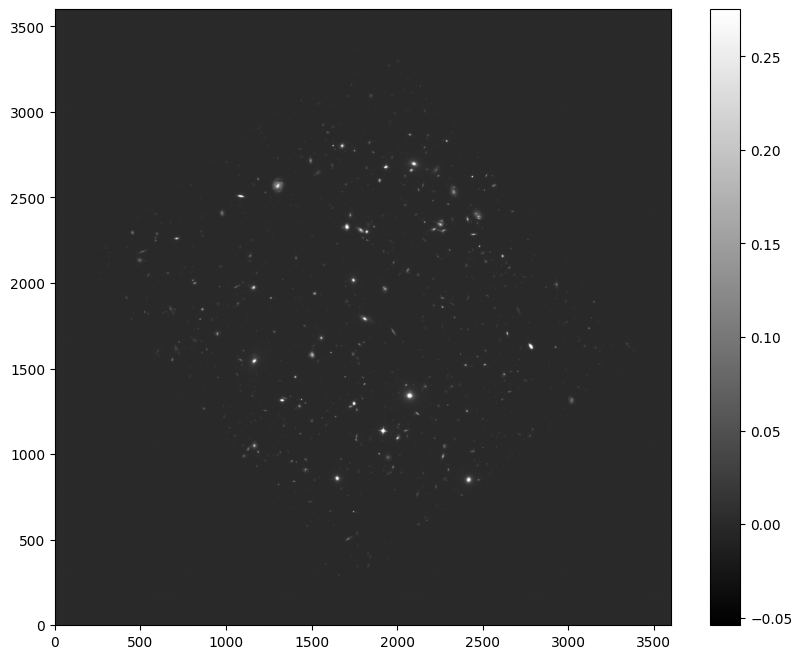

In [9]:
m, s = np.mean(image_data), np.std(image_data)

plt.figure(figsize=(10,8))
plt.imshow(image_data, cmap='gray', origin='lower',
           vmin=m-1*s, vmax=m+5*s)
plt.colorbar()
plt.show()

In [10]:
data = np.asarray(image_data,dtype=np.float64) 

In [11]:
image_data = image_data.astype(image_data.dtype.newbyteorder('='))
bkg = sep.Background(data) 

In [12]:
bkg_image = bkg.back()

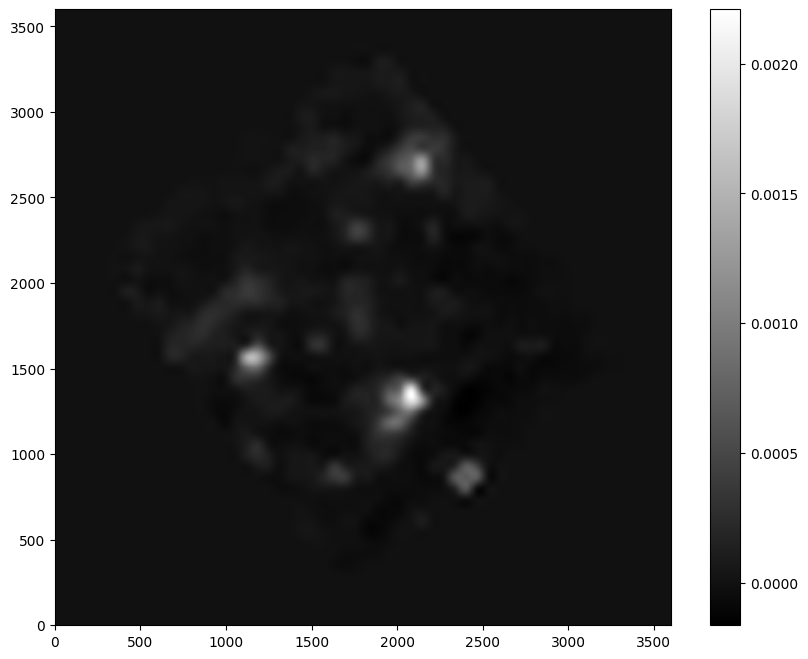

In [13]:
plt.imshow(bkg_image,interpolation='nearest',cmap='gray', origin='lower')
plt.colorbar();

In [14]:
bkg_rms = bkg.rms()

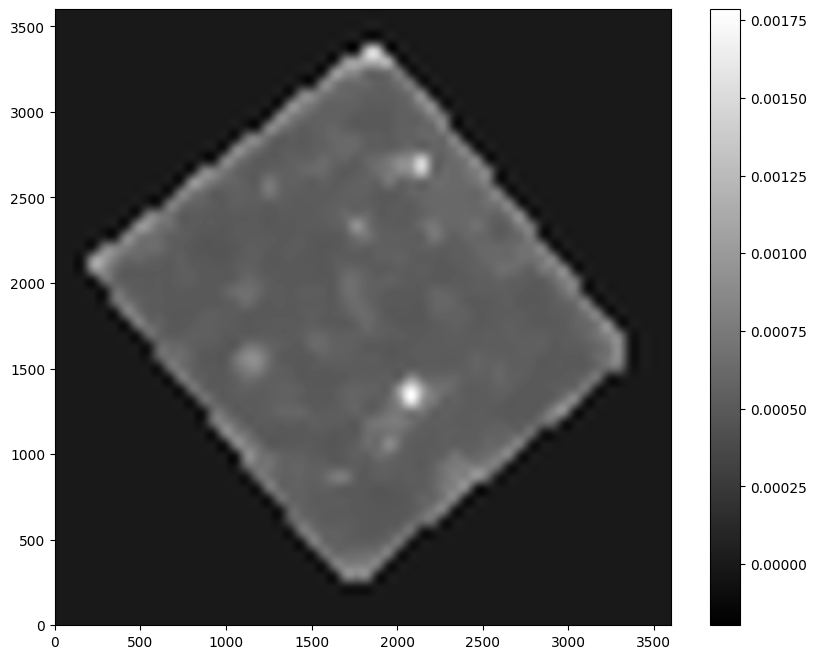

In [15]:
plt.imshow(bkg_rms,interpolation='nearest',cmap='gray',origin='lower')
plt.colorbar();

In [16]:
data = np.ascontiguousarray(data,dtype=np.float64)
mask = ~np.isfinite(data)
if mask.any():
    median_val = np.nanmedian(data)
    data[mask] = median_val 

In [17]:
data_sub = data - bkg

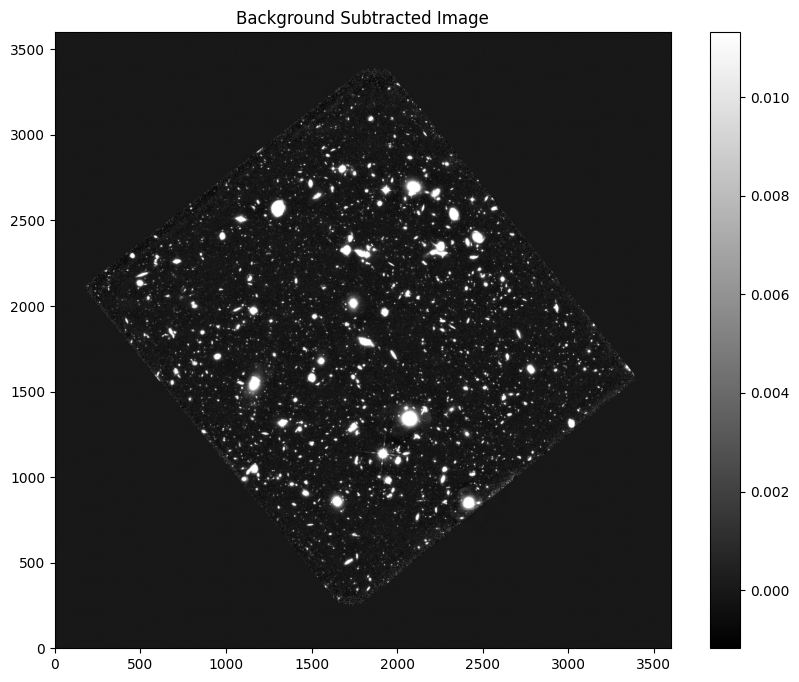

In [19]:
vmin, vmax = np.percentile(data_sub, (1, 99))
plt.imshow(data_sub, cmap='gray', origin='lower',
           vmin=vmin, vmax=vmax)
plt.title("Background Subtracted Image")
plt.colorbar()

In [22]:
data = np.ascontiguousarray(data, dtype=np.float64) 
mask = ~np.isfinite(data) 
if mask.any():
    median_val = np.nanmedian(data) 
    data[mask] = median_val 

In [63]:
objects = sep.extract(data_sub, thresh=5 * bkg.globalrms) 
print(len(objects))

2633


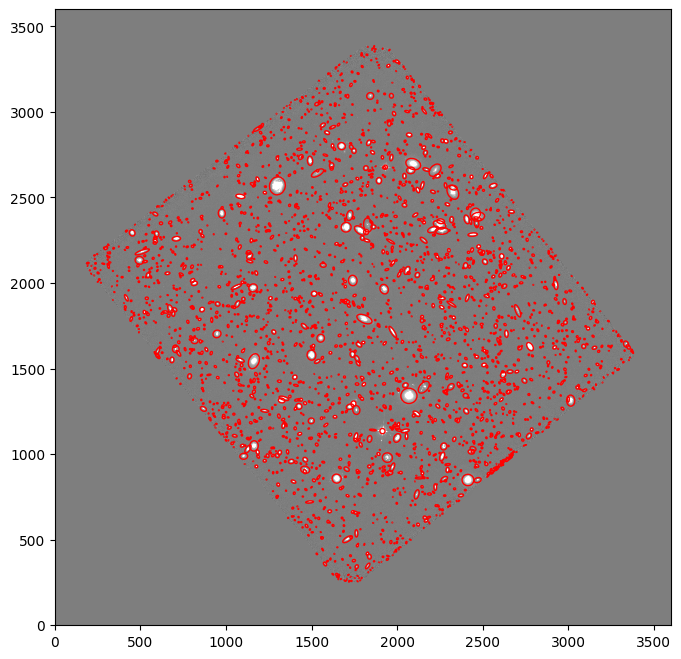

In [64]:
from matplotlib.patches import Ellipse 
fig, ax = plt.subplots() 
m, s = np.mean(data_sub), np.std(data_sub) 
im = ax.imshow(data_sub, interpolation='nearest',cmap='gray',
               vmin=m-s, vmax = m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]), 
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi) 
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e) 

In [65]:
num_sources = len(objects) 
print("Number of sources detected:", num_sources)

Number of sources detected: 2633


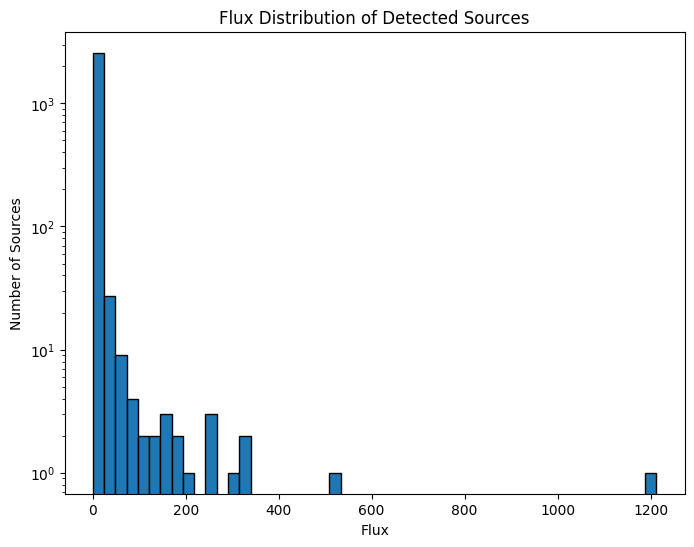

In [66]:
objects['flux']

fluxes = objects['flux']

plt.figure(figsize=(8,6))
plt.hist(fluxes,bins=50,edgecolor='black')
plt.xlabel('Flux')
plt.ylabel('Number of Sources') 
plt.title('Flux Distribution of Detected Sources') 
plt.yscale('log')
plt.show()

In [67]:
fluxes = objects["flux"] 

mean_flux = np.mean(fluxes)
median_flux = np.median(fluxes) 
std_flux = np.std(fluxes) 

print("Mean flux:", mean_flux) 
print("Median flux:", median_flux) 
print("Standard deviation:", std_flux)

Mean flux: 3.574828184173332
Median flux: 0.17672018706798553
Standard deviation: 31.187207950985535


In [68]:
high_outliers = objects[fluxes > mean_flux + 3*std_flux]

print("Number of bright outliers:", len(high_outliers))

Number of bright outliers: 18


In [69]:
for obj in high_outliers: 
    print("Outlier at (x,y):",obj['x'], obj['y'], "FLux:", obj['flux'])

Outlier at (x,y): 2413.514158347865 848.5088748894077 FLux: 329.93438720703125
Outlier at (x,y): 1646.3724645971097 856.692627662353 FLux: 253.86972045898438
Outlier at (x,y): 1914.2791323768276 1134.319059732241 FLux: 1212.5137939453125
Outlier at (x,y): 1744.4795854168328 1293.9194940105108 FLux: 158.48385620117188
Outlier at (x,y): 1324.6740116996696 1312.8601858380039 FLux: 140.2781219482422
Outlier at (x,y): 2068.844933494857 1340.3255672939006 FLux: 513.8609619140625
Outlier at (x,y): 1162.5433720464812 1542.7315047087195 FLux: 252.69601440429688
Outlier at (x,y): 1499.1848946808427 1578.3526244575141 FLux: 98.0118637084961
Outlier at (x,y): 2776.2401432409506 1627.8259285054123 FLux: 207.2777099609375
Outlier at (x,y): 1808.722059499629 1789.0925264427744 FLux: 148.48574829101562
Outlier at (x,y): 1740.5140102733626 2014.4389196362872 FLux: 136.76710510253906
Outlier at (x,y): 1783.9676411846606 2306.940240917155 FLux: 98.73123931884766
Outlier at (x,y): 1701.5911827617854 2325.

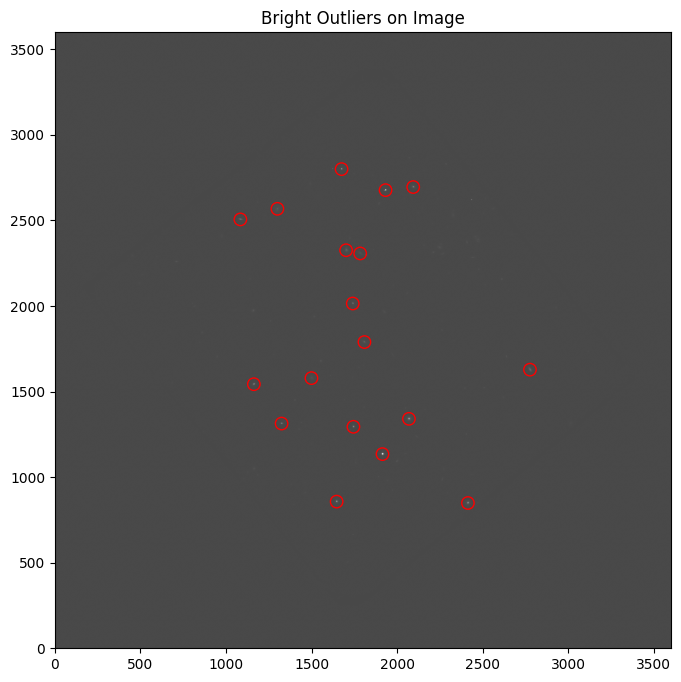

In [70]:
plt.figure(figsize=(8,8)) 
plt.imshow(data_sub, cmap='gray', origin='lower', vmin=-2, vmax=5) 
plt.scatter(high_outliers['x'], high_outliers['y'], 
            facecolors='none', edgecolors='red', s=80) 
plt.title("Bright Outliers on Image") 
plt.show()

In [71]:
z_scores = (high_outliers['flux'] - mean_flux) / std_flux

In [73]:
for obj, z in zip(high_outliers, z_scores):
    print(f"Flux {obj['flux']} is {z:.2f} ∑ above the mean")
# Suppose your fluxes are stored in an array called `fluxes`
p99 = np.percentile(fluxes, 99)     # 99th percentile threshold
outliers = fluxes[fluxes > p99]     # all outlier values
largest_outlier = np.max(outliers)  # the largest outlier

print(f"The largest outlier is {largest_outlier}")

Flux 329.93438720703125 is 10.46 ∑ above the mean
Flux 253.86972045898438 is 8.03 ∑ above the mean
Flux 1212.5137939453125 is 38.76 ∑ above the mean
Flux 158.48385620117188 is 4.97 ∑ above the mean
Flux 140.2781219482422 is 4.38 ∑ above the mean
Flux 513.8609619140625 is 16.36 ∑ above the mean
Flux 252.69601440429688 is 7.99 ∑ above the mean
Flux 98.0118637084961 is 3.03 ∑ above the mean
Flux 207.2777099609375 is 6.53 ∑ above the mean
Flux 148.48574829101562 is 4.65 ∑ above the mean
Flux 136.76710510253906 is 4.27 ∑ above the mean
Flux 98.73123931884766 is 3.05 ∑ above the mean
Flux 186.99673461914062 is 5.88 ∑ above the mean
Flux 170.38865661621094 is 5.35 ∑ above the mean
Flux 334.12786865234375 is 10.60 ∑ above the mean
Flux 310.5633850097656 is 9.84 ∑ above the mean
Flux 249.13877868652344 is 7.87 ∑ above the mean
Flux 168.6073455810547 is 5.29 ∑ above the mean
The largest outlier is 1212.5137939453125


In [50]:
f160_file = "/Users/lorenalzona/Downloads/hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits"
f125_file = "/Users/lorenalzona/Downloads/hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits"
f105_file = "/Users/lorenalzona/Downloads/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits"

In [51]:
hdu_list = fits.open(f160_file) 
hdu_list.info()

Filename: /Users/lorenalzona/Downloads/hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     358   (3600, 3600)   float32   


In [52]:
hdu_list = fits.open(f125_file) 
hdu_list.info()

Filename: /Users/lorenalzona/Downloads/hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     358   (3600, 3600)   float32   


In [53]:
def load_fits(path):
    with fits.open(path) as hdul:
        return hdul[0].data.astype(float)

In [54]:
hdu_list.close()

In [58]:
f160_img = load_fits(f160_file)
f125_img = load_fits(f125_file)
f105_img = load_fits(f105_file)

In [59]:
def normalize(img, pmin=1, pmax=99):
    vmin, vmax = np.percentile(img, (pmin, pmax))
    img = np.clip((img - vmin) / (vmax - vmin), 0, 1) 
    return img 

R = normalize(f160_img) 
G = normalize(f125_img) 
B = normalize(f105_img)

In [60]:
rgb = np.dstack([R, G, B]) 

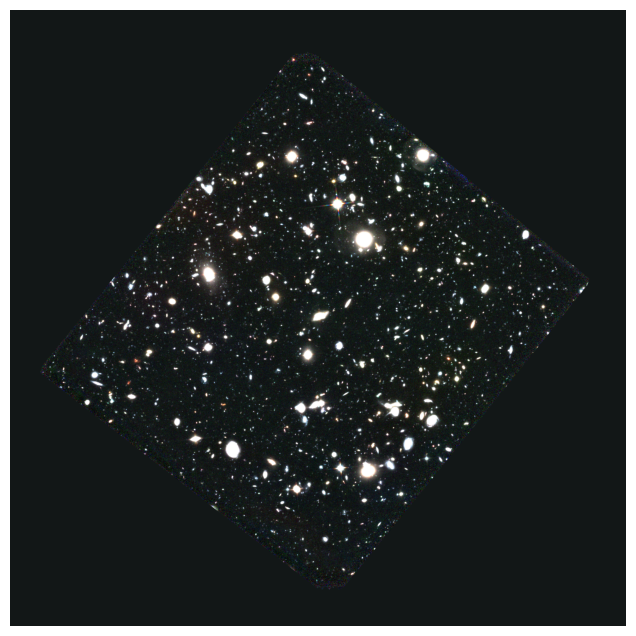

In [62]:
plt.figure(figsize=(8,8)) 
plt.imshow(rgb)
plt.axis('off')

plt.savefig("udf_color.png",dpi=200, bbox_inches='tight')